### Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, is a time series forecasting method for univariate data without a trend or seasonality. It requires a single parameter, called alpha also called the smoothing factor or smoothing coefficient. Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction.

In [5]:
import numpy as np
import os
from pandas import read_excel
from matplotlib import pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error 
from math import sqrt 


In [6]:
os.chdir("C:\\Users\\satish\\Desktop")

In [10]:
series = read_excel("TSF_data.xlsx", sheet_name = "SES")

In [11]:
series.head(10)

,t,y
0,1,93
1,2,80
2,3,25
3,4,97
4,5,1
5,6,26
6,7,59
7,8,93
8,9,5
9,10,84


In [12]:
series.describe()

,t,y
count,20.00000,20.000000
mean,10.50000,54.350000
std,5.91608,35.680269
min,1.00000,1.000000
25%,5.75000,18.000000
50%,10.50000,64.500000
75%,15.25000,84.250000
max,20.00000,97.000000


In [24]:
# split into train and test data
train = series.iloc[0:15]
test = series.iloc[15:]
y_hat = test.copy()

In [25]:
y_hat

,t,y
15,16,11
16,17,80
17,18,18
18,19,97
19,20,61


In [26]:
# fit  SES model without specifying smooth parameter, so library does it for us
fit_x = SimpleExpSmoothing(np.asarray(train['y'])).fit(optimized=True)

C:\Users\satish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [27]:
print("Optimal alpha chosen:", fit_x.model.params['smoothing_level'])

Optimal alpha chosen: 1.4901161193847656e-08


In [28]:
# fit SES model with explicitly supplied smooth parameter

fit_x_sl = SimpleExpSmoothing(np.asarray(train['y'])).fit(smoothing_level = 0.4, optimized = False)

In [29]:
rmse_train_opti = sqrt(mean_squared_error(train['y'], fit_x.fittedvalues))
print("rmse of fitted value with optimal alpha: ", rmse_train_opti)

rmse of fitted value with optimal alpha:  35.08592653138699


In [30]:
rmse_train = sqrt(mean_squared_error(train['y'], fit_x_sl.fittedvalues))
print("rmse of fitted value with supplied alpha: ", rmse_train)

rmse of fitted value with supplied alpha:  42.362556292570495


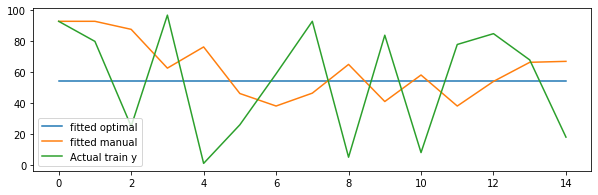

In [31]:
plt.figure(figsize = (10,3))
plt.plot(fit_x.fittedvalues, label = "fitted optimal")
plt.plot(fit_x_sl.fittedvalues, label = "fitted manual")
plt.plot(train["y"], label = "Actual train y")
plt.legend(loc = "best")
plt.show()

In [32]:
y_hat.shape[0]

5

In [33]:
# forecast using both models
y_hat["SES_opti_fcast"] = fit_x.forecast(len(y_hat))
y_hat["SES_manu_fcast"] = fit_x_sl.forecast(len(y_hat))


In [34]:
rmse_train_opti = sqrt(mean_squared_error(test['y'], y_hat.SES_opti_fcast))
print("rmse of fitted value with optimal alpha: ", rmse_train_opti)

rmse_train = sqrt(mean_squared_error(test['y'], y_hat.SES_manu_fcast))
print("rmse of fitted value with supplied alpha: ", rmse_train)

rmse of fitted value with optimal alpha:  33.83850541459252
rmse of fitted value with supplied alpha:  34.335636783312054


### We can see that the optimal alpha chosen 1.4901161193847656e-08 provides a better model accuracy than the manual alpha of 0.4.